In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import os
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import HTML
import plotly.graph_objects as go
pd.set_option('display.max_rows',20000, 'display.max_columns',130)
import missingno  as msno
%matplotlib inline

### Importing the Datasets

In [2]:
application_data = pd.read_csv("application_data.csv")
previous_data = pd.read_csv("previous_application.csv")

### Checking the structure of the datasets

In [3]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
application_data.shape

(307511, 122)

In [6]:
previous_data.shape

(1670214, 37)

In [7]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Finding the percentage of missing values for all columns in current application dataset

In [9]:
application_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

### Finding the relation between columns with respect to null values

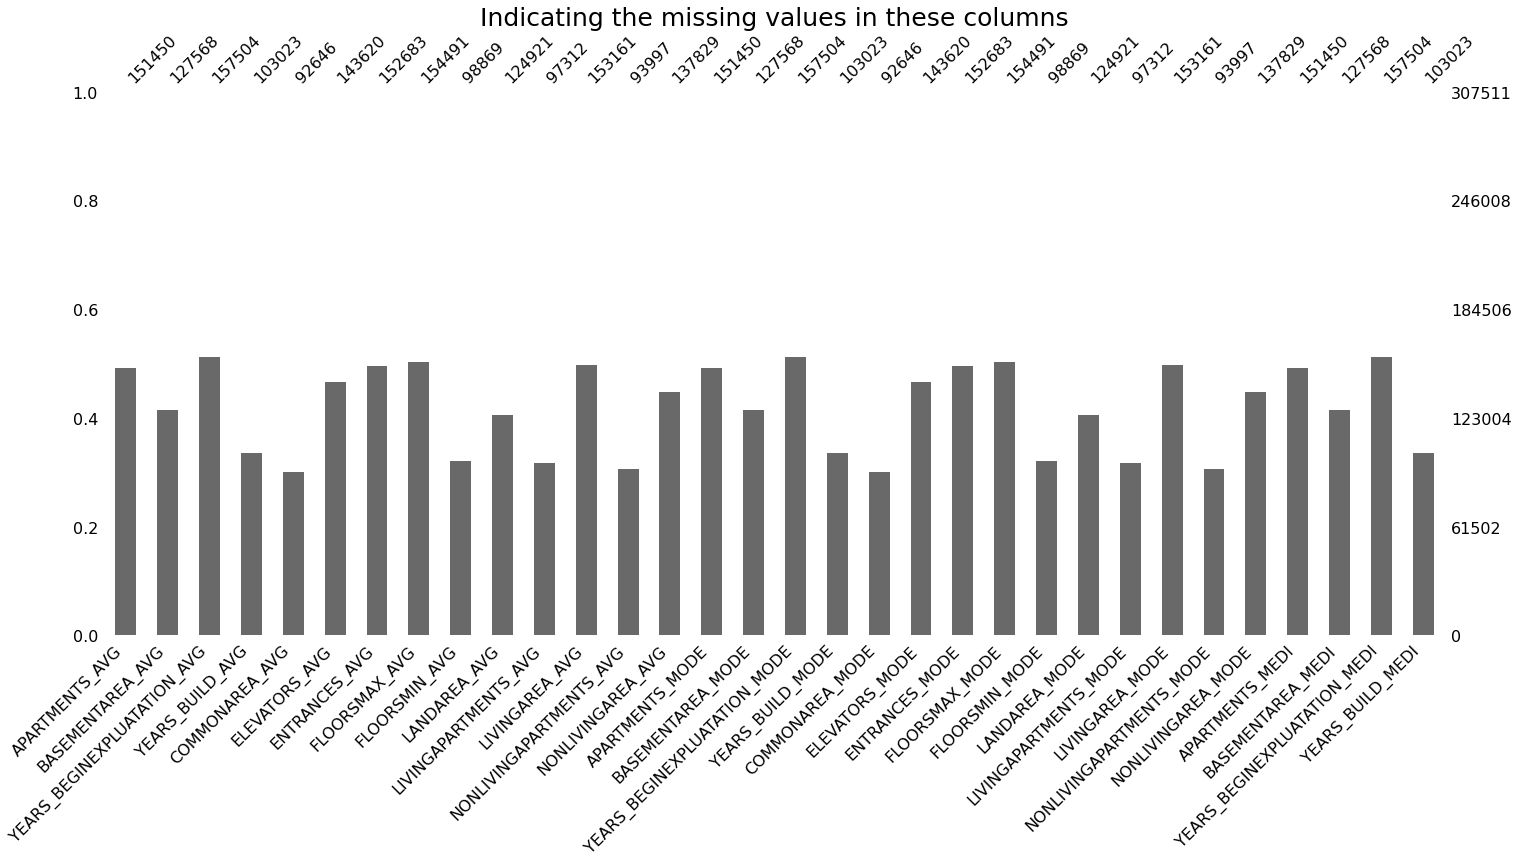

In [10]:
plt.style.use("default")
%matplotlib inline
msno.bar(application_data.iloc[:, 44:76])
plt.title('Indicating the missing values in these columns', fontsize=25)
plt.show()

```Inference:``` The height of the bars is very less which means there are many missing values

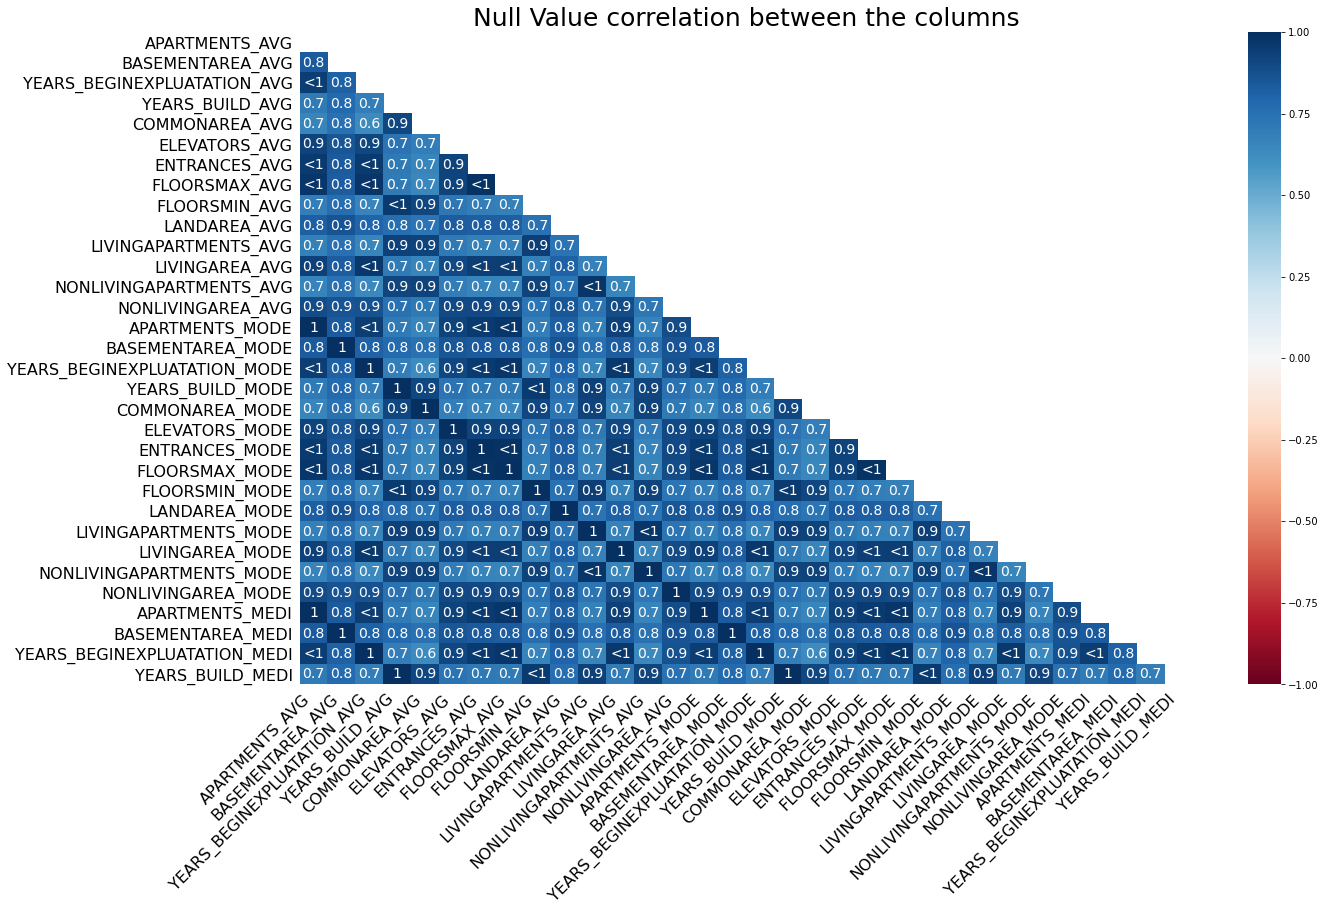

In [11]:
plt.style.use("default")
%matplotlib inline
msno.heatmap(application_data.iloc[:, 44:76])
plt.title('Null Value correlation between the columns', fontsize=25)
plt.show()

```Conclusion:``` The above two graphs show that these columns have a high correlation regarding null values. i.e. If one column has null values then there is a likelihood that the other column will also have null values. due to the high number of null values observed, we will drop these columns.

#### Dropping the columns with high missing percentage and the unwanted columns

In [12]:
app_data = application_data.drop(application_data.iloc[:,43:91],axis=1)
app_data.drop(app_data.iloc[:,43:74], axis=1,inplace=True)
unwanted = ['OWN_CAR_AGE','EXT_SOURCE_1','NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START', 'FLAG_EMP_PHONE','HOUR_APPR_PROCESS_START',
            'FLAG_WORK_PHONE', 'FLAG_PHONE','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','DAYS_REGISTRATION',
            'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
app_data.drop(labels=unwanted,axis=1,inplace=True)
app_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_CONT_MOBILE                   0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
ORGANIZATION_TYPE                  0
E

### Finding the missing values for all columns in previous application dataset

In [13]:
previous_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

#### Dropping the columns with high missing percentage

In [14]:
prev_data = previous_data.drop(previous_data.iloc[:,31:37], axis=1)
prev_data.drop(previous_data.iloc[:,12:15], axis=1,inplace=True)
prev_data.drop(['NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'],axis=1,inplace = True)
prev_data.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_DOWN_PAYMENT               895844
AMT_GOODS_PRICE                385515
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

### Finding the categorical and continuous columns

In [15]:
app_data.nunique().sort_values() 

TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
FLAG_EMAIL                          2
FLAG_CONT_MOBILE                    2
FLAG_MOBIL                          2
REGION_RATING_CLIENT_W_CITY         3
CODE_GENDER                         3
REGION_RATING_CLIENT                3
NAME_EDUCATION_TYPE                 5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
NAME_INCOME_TYPE                    8
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
ORGANIZATION_TYPE                  58
REGION_POPULATION_RELATIVE         81
AMT_GOODS_PRICE                  1002
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
DAYS_ID_PUBLISH                  6168
DAYS_EMPLOYED                   12574
AMT_ANNUITY                     13672
DAYS_BIRTH                      17460
EXT_SOURCE_2

```Inference :``` The columns having high number of unique values show that they are continuous. The ones with low number of unique values are categorical.

In [16]:
prev_data.nunique().sort_values()

FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
NAME_PRODUCT_TYPE                    3
NAME_CONTRACT_TYPE                   4
NAME_PAYMENT_TYPE                    4
NAME_CLIENT_TYPE                     4
NAME_CONTRACT_STATUS                 4
NAME_PORTFOLIO                       5
NAME_YIELD_GROUP                     5
CHANNEL_TYPE                         8
CODE_REJECT_REASON                   9
NAME_SELLER_INDUSTRY                11
PRODUCT_COMBINATION                 17
NAME_CASH_LOAN_PURPOSE              25
NAME_GOODS_CATEGORY                 28
CNT_PAYMENT                         49
SELLERPLACE_AREA                  2097
DAYS_DECISION                     2922
AMT_DOWN_PAYMENT                 29278
AMT_CREDIT                       86803
AMT_APPLICATION                  93885
AMT_GOODS_PRICE                  93885
SK_ID_CURR                      338857
AMT_ANNUITY                     357959
SK_ID_PREV                     1670214
dtype: int64

### Changing the datatypes of the columns appropriately

In [17]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [18]:
cols_1 = list(['TARGET','FLAG_MOBIL','FLAG_CONT_MOBILE','FLAG_EMAIL'])
app_data[cols_1] = app_data[cols_1].astype('object')
app_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH']] = app_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH']].abs()

In [19]:
print('The NAME_CONTRACT_TYPE has \n{} values'.format(app_data['NAME_CONTRACT_TYPE'].value_counts()))
print()

print('The CODE_GENDER has \n{} values'.format(app_data['CODE_GENDER'].value_counts()))
print()

print('The FLAG_OWN_CAR has \n{} values'.format(app_data['FLAG_OWN_CAR'].value_counts()))
print()

print('The FLAG_OWN_REALTY has \n{} values'.format(app_data['FLAG_OWN_REALTY'].value_counts()))
print()

print('The CNT_CHILDREN has \n{} values'.format(app_data['CNT_CHILDREN'].value_counts()))
print()

print('The ORGANIZATION_TYPE has \n{} values'.format(app_data['ORGANIZATION_TYPE'].value_counts()))
print()

print('The NAME_EDUCATION_TYPE has \n{} values'.format(app_data['NAME_EDUCATION_TYPE'].value_counts()))

The NAME_CONTRACT_TYPE has 
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64 values

The CODE_GENDER has 
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64 values

The FLAG_OWN_CAR has 
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64 values

The FLAG_OWN_REALTY has 
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64 values

The CNT_CHILDREN has 
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64 values

The ORGANIZATION_TYPE has 
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten     

In [20]:
#Dropping XNA entry from both these columns
app_data=app_data.drop(app_data.loc[app_data['CODE_GENDER']=='XNA'].index)
app_data=app_data.drop(app_data.loc[app_data['ORGANIZATION_TYPE']=='XNA'].index)

### For missing values greater than 13% and less than 50% we can impute them as follows:


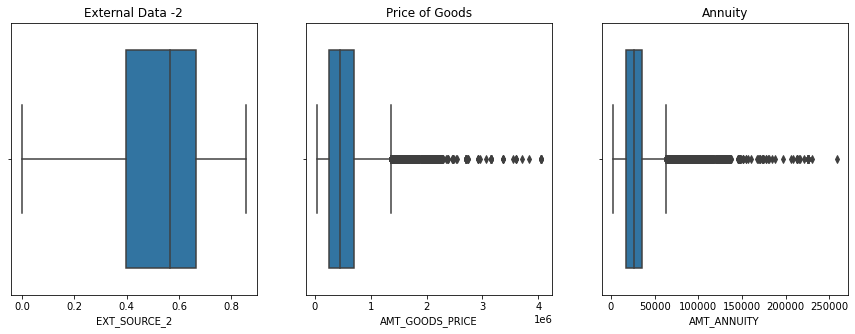

In [21]:
plt.style.use("default")
%matplotlib inline
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.title("External Data -2")
sns.boxplot( app_data['EXT_SOURCE_2'])

plt.subplot(1,3,2)
plt.title("Price of Goods")
sns.boxplot(app_data['AMT_GOODS_PRICE'])

plt.subplot(1,3,3)
plt.title("Annuity")
sns.boxplot(app_data['AMT_ANNUITY'])
plt.show()

For EXT_SOURCE_2 does not have outliers hence we can impute it with the mean of the data, AMT_GOODS_PRICE,AMT_ANNUITY do have outliers hence it would be appropriate to impute the null values with the median of the data. For OCCUPATION_TYPE having 41017 null values, since it is a categorical variable , we can choose the mode to impute the missing values. 

### Checking Outliers for numerical Variables

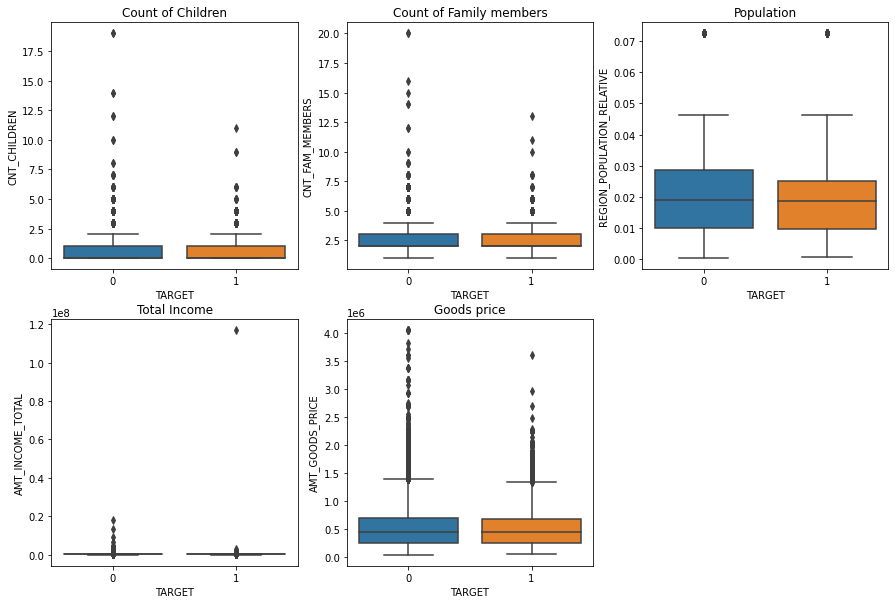

In [22]:
# Bivariate: Continuous-Categorical
plt.style.use("default")
%matplotlib inline
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
plt.title("Count of Children")
sns.boxplot(app_data['TARGET'], app_data['CNT_CHILDREN'])

plt.subplot(2,3,2)
plt.title("Count of Family members")
sns.boxplot(app_data['TARGET'], app_data['CNT_FAM_MEMBERS'])

plt.subplot(2,3,3)
plt.title("Population")
sns.boxplot(app_data['TARGET'], app_data['REGION_POPULATION_RELATIVE'])

plt.subplot(2,3,4)
plt.title("Total Income")
sns.boxplot(app_data['TARGET'], app_data['AMT_INCOME_TOTAL'])

plt.subplot(2,3,5)
plt.title("Goods price")
sns.boxplot(app_data['TARGET'], app_data['AMT_GOODS_PRICE'])



plt.show()

```Observation:``` The number of children has certain values that are exceeding the norm, like 19. These values should be omitted.
    We observe that the count of family members also has outliers which need to be removed. The number of outliers and the value 
    is higher for defaulters than non-defaulters for number of children, family members and for goods price. There is one significantly 
    high value for income in the non-defaulters boxplot which should be removed. The region population relative has an outlier which
    can be ignored as it does not affect our analysis.

<!-- # from pandas_profiling import ProfileReport
# prof = ProfileReport(app_data)
# prof.to_file(output_file='app_data.html') -->

### Converting the columns from Continuous to Categorical by Binning

In [23]:
app_data.AMT_ANNUITY.describe()  

count    252121.000000
mean      27812.449610
std       14647.829516
min        1980.000000
25%       17073.000000
50%       25834.500000
75%       35617.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [24]:
app_data['AMT_ANNUITY_RANGE'] = pd.cut(app_data['AMT_ANNUITY'], [1615,16524,24903,27108,34596,258025], labels = ['Low','Below Avg','Avg','Above Avg','High'] )

In [25]:
app_data.AMT_INCOME_TOTAL.describe()

count    2.521330e+05
mean     1.759139e+05
std      2.588536e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [26]:
app_data['AMT_INCOME_RANGE'] = pd.cut(app_data['AMT_INCOME_TOTAL'], [25650,112500,147150,168797,202500,117000000], labels = ['Low_Income','Below_Avg_Income','Avg_Income','Above_Avg_Income','High_Income'])

In [27]:
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000]
slot = ['0-50000', '50000-100000','100000-150000','150000,200000','200000-250000', '250000-300000', '300000-350000',
        '350000-400000','400000-450000','450000-500000','500000 and above']

app_data['AMT_CREDIT_RANGE']=pd.cut(app_data['AMT_CREDIT'],bins,labels=slot)

### Analysing the Application Dataset

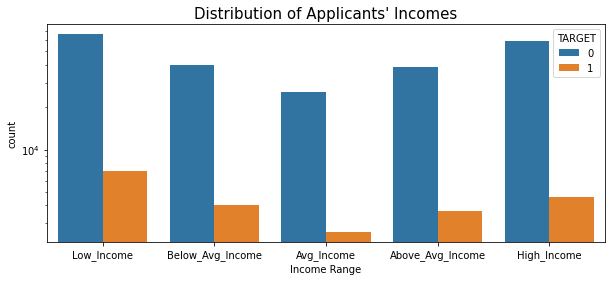

In [28]:
plt.style.use("default")
%matplotlib inline
plt.figure(figsize=[10,4])
sns.countplot(
    x='AMT_INCOME_RANGE',
    y=None,
    hue='TARGET',
    data=app_data,
    saturation=0.75,
    dodge=True
)
plt.yscale('log')
plt.xlabel('Income Range', fontsize=10)
plt.title("Distribution of Applicants' Incomes", fontsize=15)
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 20
#plt.xticks(rotation=20)
plt.show()

```Inference``` : From the above plot, we can infer that the maximum number of loan applications and maximum number of defaulters are from low-income category. 

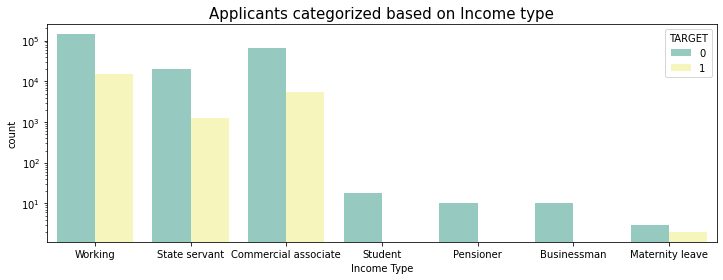

In [29]:
plt.style.use("default")
%matplotlib inline
plt.figure(figsize = [12,4])
sns.countplot(
    x='NAME_INCOME_TYPE',
    y=None,
    hue='TARGET',
    data=app_data,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette='Set3',
    saturation=0.75,
    dodge=True,
    ax=None
)
plt.yscale('log')
plt.xlabel('Income Type', fontsize=10)
plt.title('Applicants categorized based on Income type',fontsize=15)
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.show()

```Inference:``` From the above Plot we can infer that the highest number of people applying for loans is from the working category. 
    However , we also observe that student, Pensioner and Businessman have close to nil defaulters. 

### Checking the imbalance percentage

In [30]:
app_data.TARGET.value_counts()

0    230298
1     21835
Name: TARGET, dtype: int64

In [31]:
app_data.TARGET.value_counts(normalize = True)   # normalizing it

0    0.913399
1    0.086601
Name: TARGET, dtype: float64

### Separating the Defaulters from non-defaulters

In [32]:
defaulters = app_data[app_data['TARGET'] == 1] 

In [33]:
non_defaulters = app_data[app_data['TARGET'] == 0]

In [34]:
defaulters.shape

(21835, 31)

In [35]:
non_defaulters.shape

(230298, 31)

### Univariate Analysis

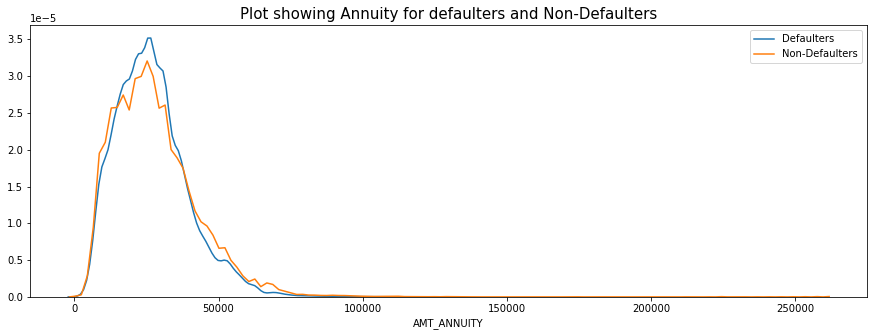

In [36]:
plt.style.use("default")
%matplotlib inline
plt.figure(figsize=[15,5])
sns.distplot(defaulters['AMT_ANNUITY'], hist=False, label = 'Defaulters')
sns.distplot(non_defaulters['AMT_ANNUITY'], hist = False, label = 'Non-Defaulters')
plt.title('Plot showing Annuity for defaulters and Non-Defaulters',fontsize=15)
plt.show()

```Inference:``` We observe that for annuity between 15000-40000, there are slightly more defaulters.

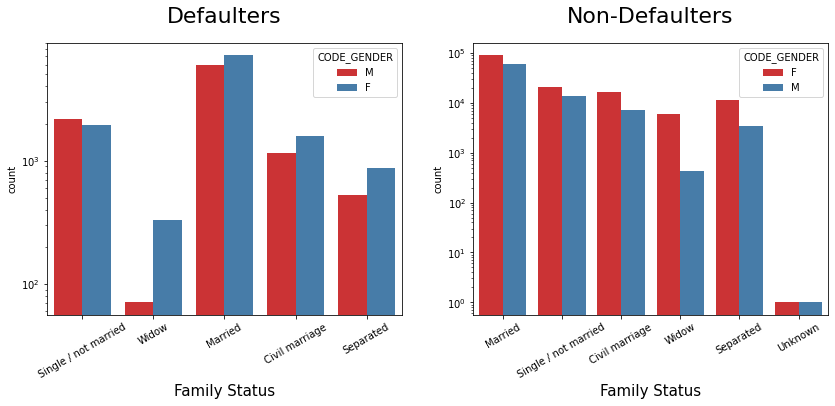

In [37]:
plt.style.use("default")
%matplotlib inline
plt.figure(figsize = [14,5])
plt.subplot(1,2,1)
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 20
plt.title('Defaulters')
sns.countplot(
    x='NAME_FAMILY_STATUS',
    y=None,
    hue='CODE_GENDER',
    data=defaulters,
    palette='Set1',
    saturation=0.75,
    dodge=True,
    ax=None
)
plt.yscale('log')
plt.xlabel('Family Status', fontsize=15)
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 20
plt.xticks(rotation=30)
plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.countplot(
    x='NAME_FAMILY_STATUS',
    y=None,
    hue='CODE_GENDER',
    data=non_defaulters,
    palette='Set1',
    saturation=0.75,
    dodge=True,
    ax=None
)
plt.yscale('log')
plt.xlabel('Family Status', fontsize=15)
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 20
plt.xticks(rotation=30)
plt.show()

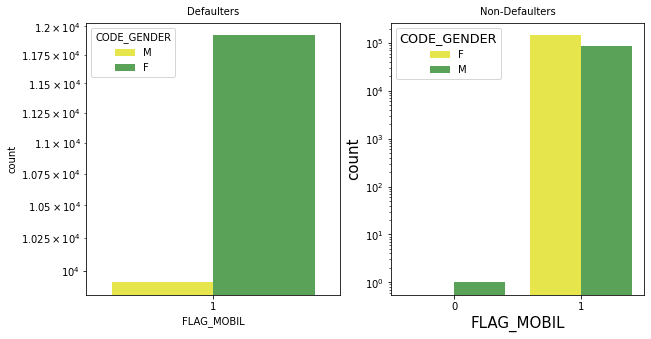

In [38]:
plt.style.use("default")
%matplotlib inline
plt.figure(figsize=[10,5])
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.titlepad'] = 8
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(
    x='FLAG_MOBIL',
    y=None,
    hue='CODE_GENDER',
    data=defaulters,
    palette='Set1_r',
    saturation=0.75,
    dodge=True
)
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.titlepad'] = 8
plt.yscale('log')

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.countplot(
    x='FLAG_MOBIL',
    y=None,
    hue='CODE_GENDER',
    data=non_defaulters,
    palette='Set1_r',
    saturation=0.75,
    dodge=True
)
plt.yscale('log')
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.titlepad'] = 8

plt.show()

```Inference:``` From the above plot we observe that all defaulters had given their phone numbers hence we cannot conclude anything from this column

### Checking the kind of contract for the respective genders

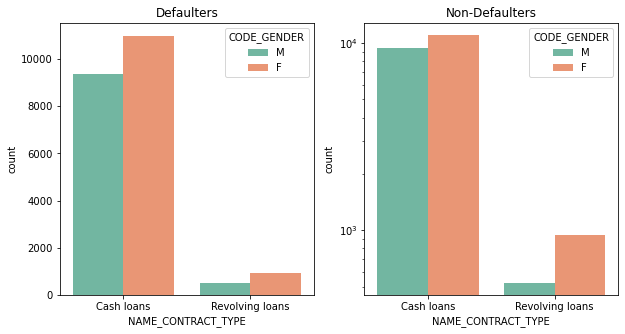

In [39]:
plt.style.use("default")
%matplotlib inline
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(
    x='NAME_CONTRACT_TYPE',
    y=None,
    hue='CODE_GENDER',
    data=defaulters,
    palette='Set2',
    saturation=0.75,
    dodge=True,
)
plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.countplot(
    x='NAME_CONTRACT_TYPE',
    y=None,
    hue='CODE_GENDER',
    data=defaulters,
    palette='Set2',
    saturation=0.75,
    dodge=True,
)
plt.yscale('log')
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=0)
plt.show()

```Inference:``` Here we observe that, overall the number of cash loans are more than revolving loans. We also observe that the number of women taking loans are more than men.

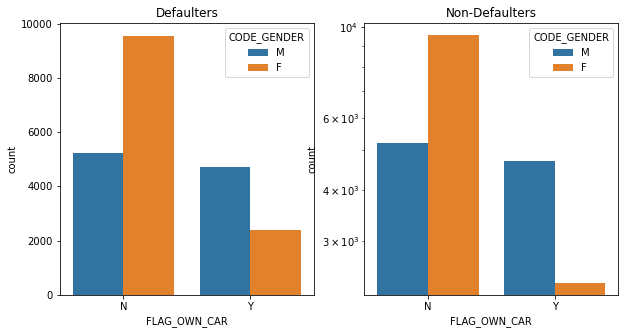

In [40]:
plt.style.use("default")
%matplotlib inline
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(
    x='FLAG_OWN_CAR',
    y=None,
    hue='CODE_GENDER',
    data=defaulters,
    palette=None,
    saturation=0.75,
    dodge=True,
    ax=None
)
plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.countplot(
    x='FLAG_OWN_CAR',
    y=None,
    hue='CODE_GENDER',
    data=defaulters,
    palette=None,
    saturation=0.75,
    dodge=True,
    ax=None
)
plt.yscale('log')
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=0)
plt.show()

```Inference:``` We observe that among the defaulters, very few women have a car but almost half the men have a car.

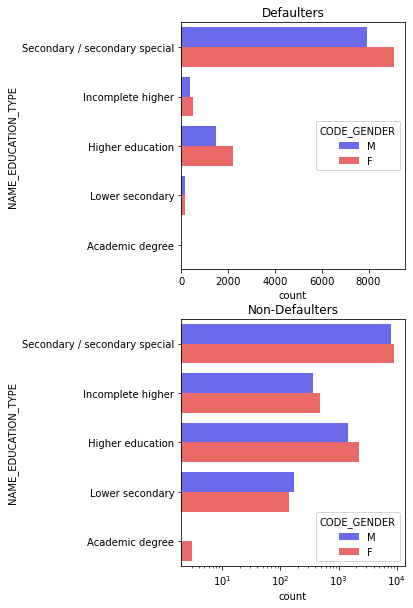

In [41]:
plt.style.use("default")
%matplotlib inline
plt.figure(figsize=[4,10])
plt.subplot(2,1,1)
plt.title('Defaulters')
sns.countplot(
    x=None,
    y='NAME_EDUCATION_TYPE',
    hue='CODE_GENDER',
    data=defaulters,
    palette='seismic',
    saturation=0.75,
    dodge=True,
)
plt.subplot(2,1,2)
plt.title('Non-Defaulters')
sns.countplot(
    x=None,
    y='NAME_EDUCATION_TYPE',
    hue='CODE_GENDER',
    data=defaulters,
    palette='seismic',
    saturation=0.75,
    dodge=True,
)
plt.xscale('log')
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.titlepad'] = 8
plt.xticks(rotation=0)
plt.show()

```Inference:``` From the above plot we infer that most number of defaulters applications are from the people who have completed secondary education. 
We also observe that the women having an academic degree have not defaulted. The people having lower secondary education or who have not completed higher education are the ones having the least probability of defaulting.

### Plotting the organisation Type in logarithmic scale

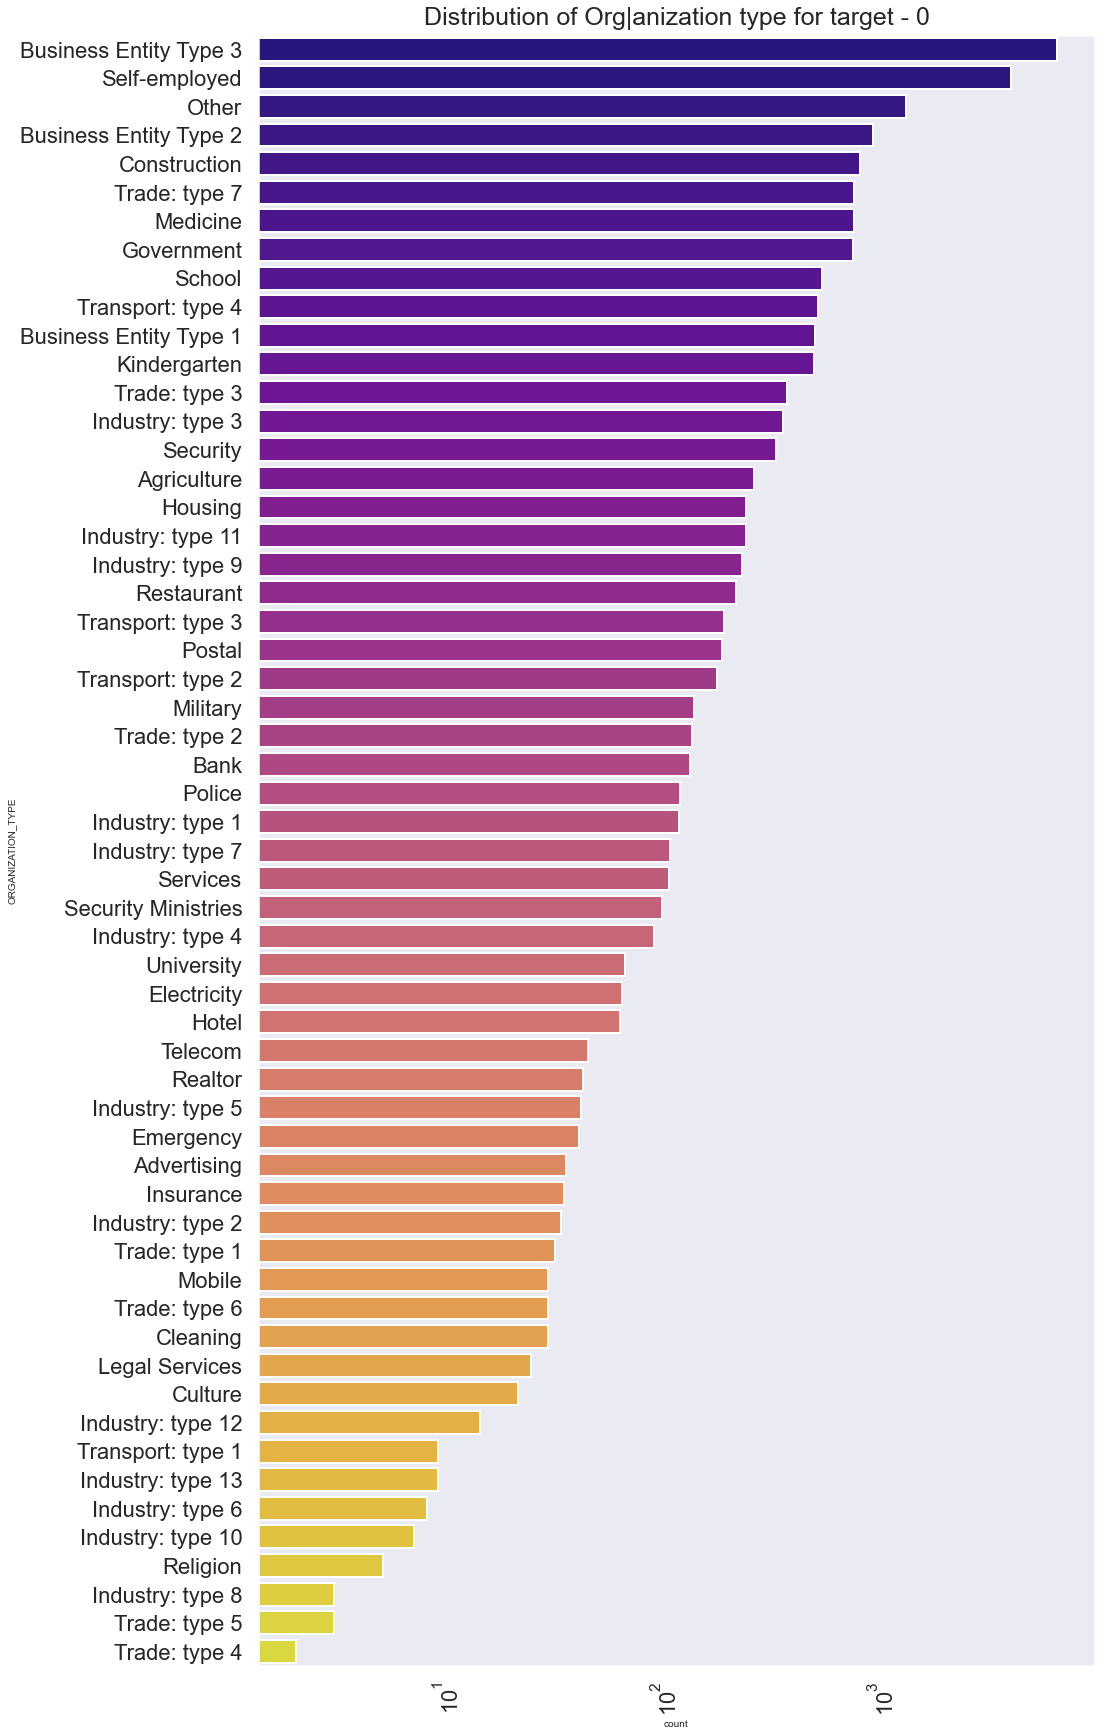

In [42]:
plt.style.use("default")
%matplotlib inline
sns.set_style('dark')
sns.set_context('poster')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.titlepad'] = 10

plt.title("Distribution of Org|anization type for target - 0",fontsize=25)

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=defaulters,y='ORGANIZATION_TYPE',order=defaulters['ORGANIZATION_TYPE'].value_counts().index,palette='plasma')

plt.show()

```Observation:``` Business Entity Type 3 have the highest number of applicants

### Finding the correlation between various columns

In [43]:
defaulters_corr = defaulters.iloc[0:,2:]
non_defaulters_corr = non_defaulters.iloc[0:,2:]

In [44]:
plt.style.use("default")
%matplotlib inline
target0= defaulters_corr.corr(method='spearman')
target0 = target0.where(np.tril(np.ones(target0.shape),k=0).astype(bool))



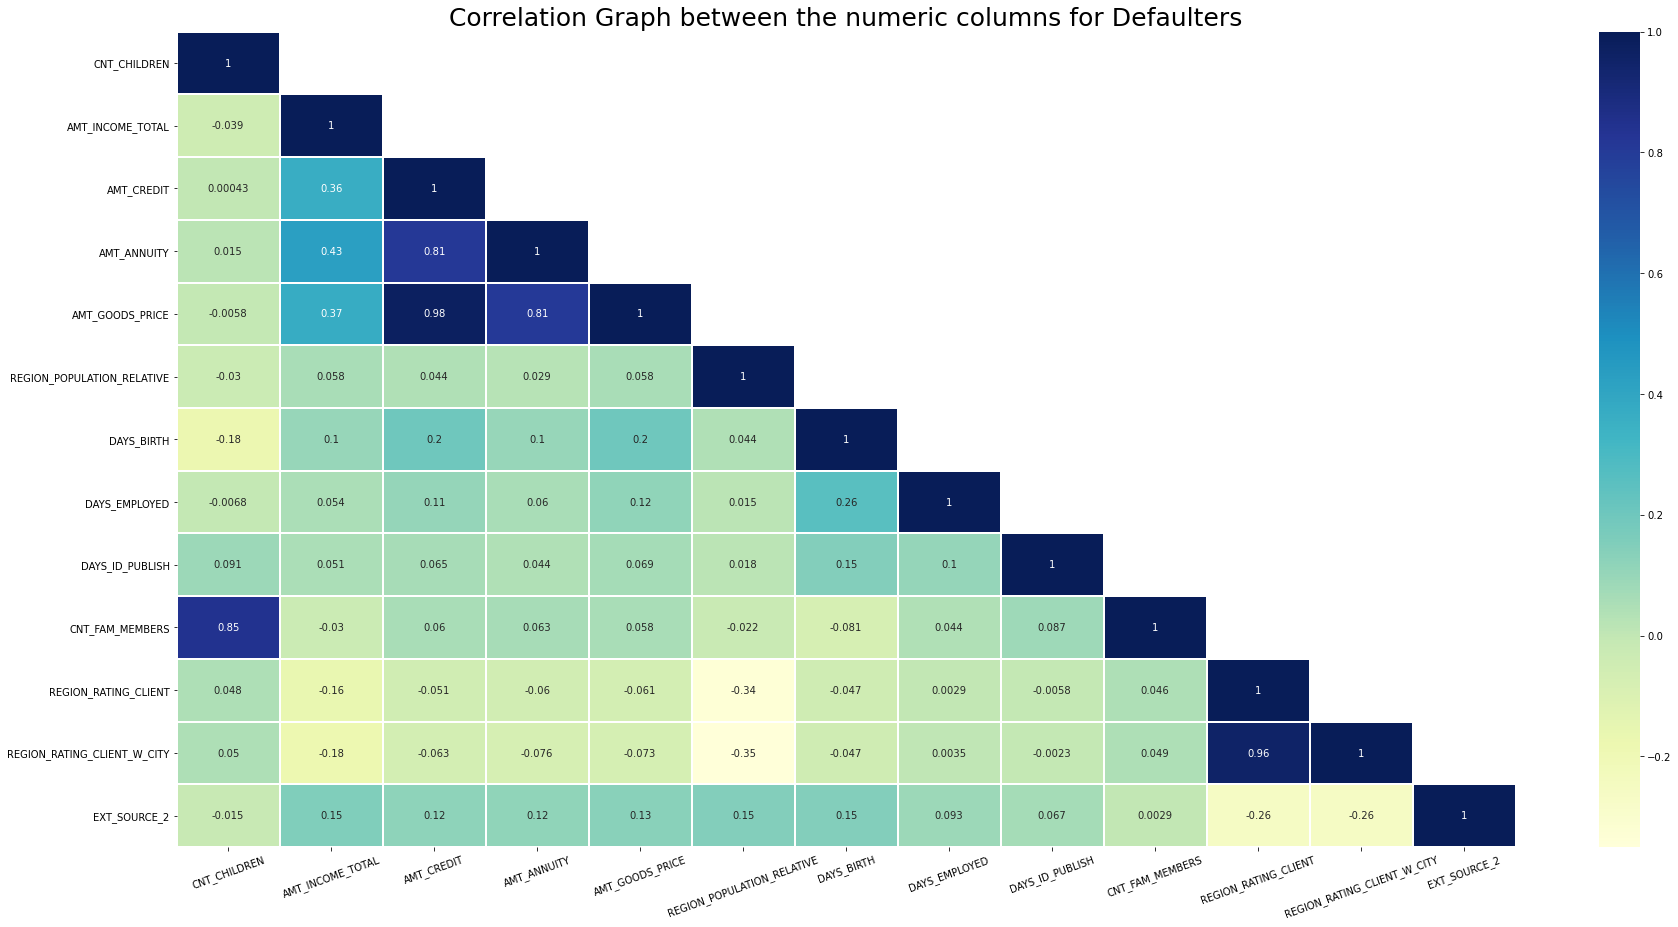

In [45]:
plt.figure(figsize=(30,15))
hmap=sns.heatmap(target0,cmap='YlGnBu', annot=True,linewidths=1, linecolor='white')
hmap.set_facecolor('xkcd:white')
plt.title('Correlation Graph between the numeric columns for Defaulters',fontsize=25)
plt.xticks(rotation=20)
plt.show()

````Observation:```` We can observe that there is a high correlation between Amount Credit and Amount Goods Service and the least correlation between regional rating of the client and population of the region of the client.

In [46]:
target0_df = target0.unstack().reset_index()
target0_df.columns=['Var1','Var2','Correlation']
target0_df.dropna(subset=['Correlation'],inplace=True)
target0_df['Correlation Abs'] = target0_df['Correlation'].abs()
target0_df.sort_values('Correlation Abs',ascending = False,inplace=True)

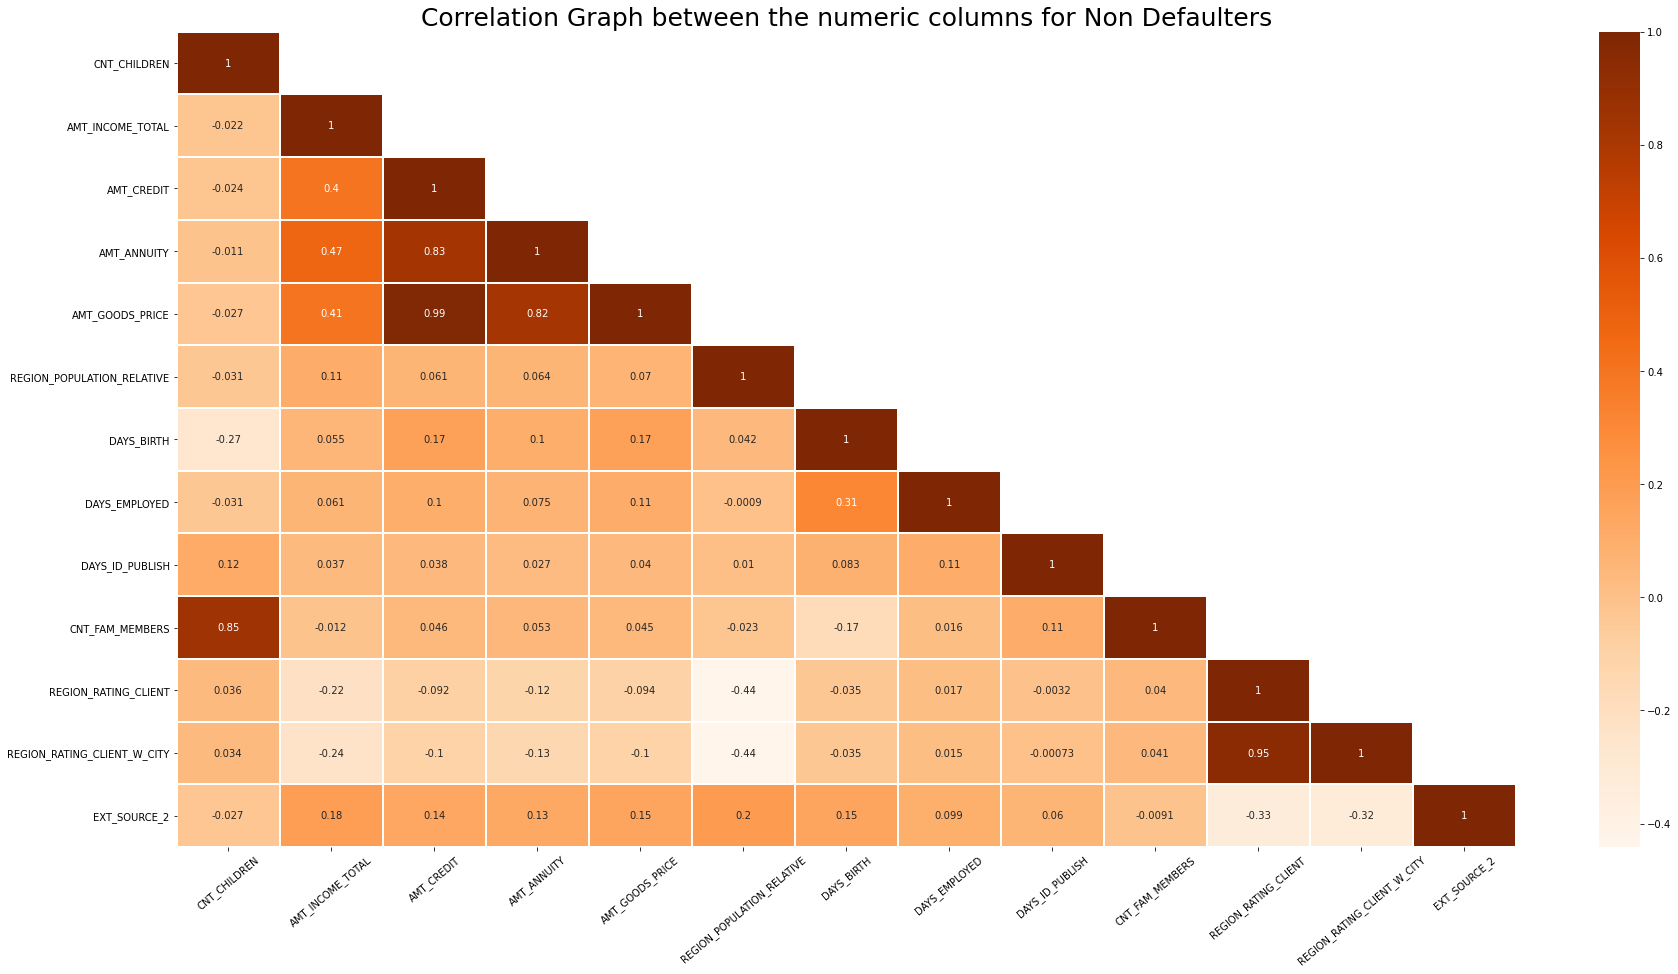

In [47]:
plt.style.use("default")
%matplotlib inline
target1= non_defaulters_corr.corr(method='spearman')
target1 = target1.where(np.tril(np.ones(target1.shape),k=0).astype(bool))
plt.figure(figsize=(30,15))
hmap=sns.heatmap(target1,cmap="Oranges",linewidths=1, linecolor='white',annot=True)
hmap.set_facecolor('xkcd:white')
plt.title('Correlation Graph between the numeric columns for Non Defaulters',fontsize=25)
plt.xticks(rotation=40)
plt.show()

```Observation:``` We see a high correlation between Amount Goods Price and Amount Annuity. 
    We also see a high correlation between count of family members and count of children.

In [48]:
target1_df = target1.unstack().reset_index()
target1_df.columns=['Var1','Var2','Correlation']
target1_df.dropna(subset=['Correlation'],inplace=True)
target1_df['Correlation Abs'] = target1_df['Correlation'].abs()
target1_df.sort_values('Correlation Abs',ascending = False,inplace=True)
target1_df

,Var1,Var2,Correlation,Correlation Abs
0,CNT_CHILDREN,CNT_CHILDREN,1.000000,1.000000
14,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,1.000000,1.000000
154,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT_W_CITY,1.000000,1.000000
140,REGION_RATING_CLIENT,REGION_RATING_CLIENT,1.000000,1.000000
126,CNT_FAM_MEMBERS,CNT_FAM_MEMBERS,1.000000,1.000000
112,DAYS_ID_PUBLISH,DAYS_ID_PUBLISH,1.000000,1.000000
98,DAYS_EMPLOYED,DAYS_EMPLOYED,1.000000,1.000000
84,DAYS_BIRTH,DAYS_BIRTH,1.000000,1.000000
70,REGION_POPULATION_RELATIVE,REGION_POPULATION_RELATIVE,1.000000,1.000000
56,AMT_GOODS_PRICE,AMT_GOODS_PRICE,1.000000,1.000000


### Bivariate Analysis

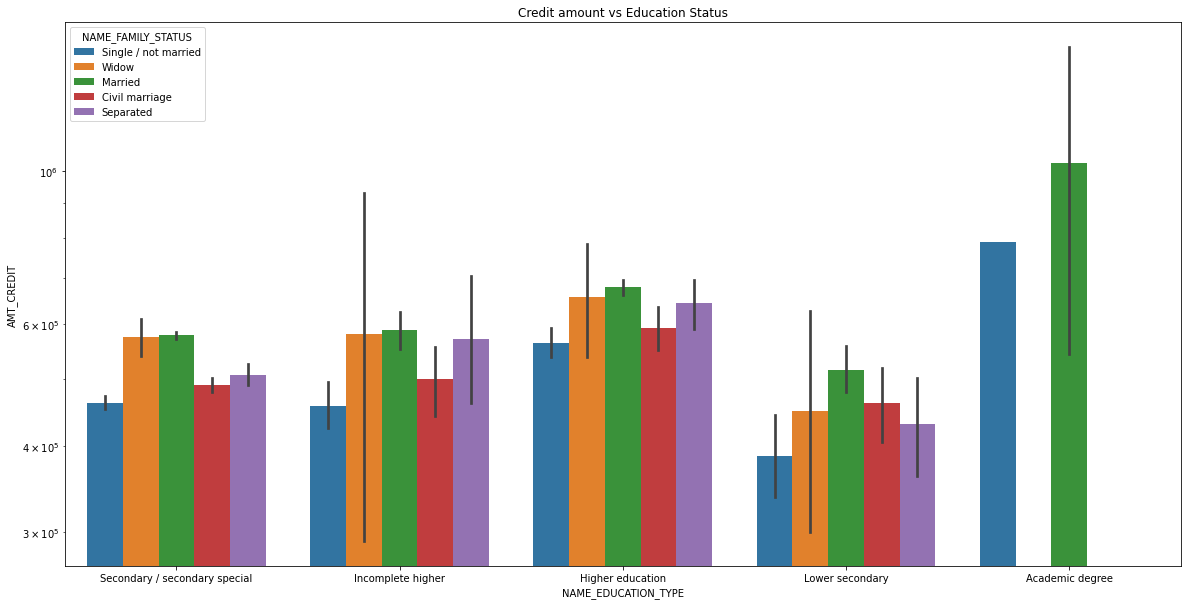

In [49]:
plt.style.use("default")
%matplotlib inline
plt.figure(figsize=(20,10))
plt.xticks(rotation=0)
plt.yscale('log')
sns.barplot(data =defaulters, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.rcParams['axes.titlesize'] = 25
plt.show()

````Inference: ```` Among all catgories, Married persons with an Academic Degree are the highest number of defaulters

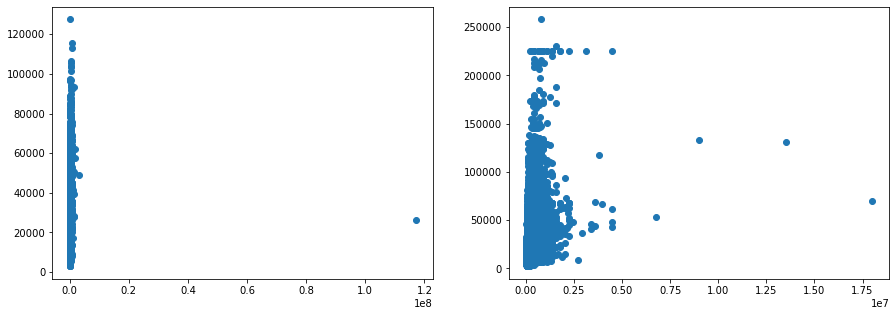

In [50]:

plt.style.use("default")
%matplotlib inline
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(defaulters['AMT_INCOME_TOTAL'], defaulters['AMT_ANNUITY'])

plt.subplot(1,2,2)
plt.scatter(non_defaulters['AMT_INCOME_TOTAL'], non_defaulters['AMT_ANNUITY'])
plt.show()

```Inference:``` From the above plot we can see that the people with greater annuity have not defaulted. The defaulters annuity lies in the range 0 - 150000

<!-- # plt.figure(figsize=[15,5])
# plt.subplot(1,2,1)
# sns.swarmplot(data = defaulters, x='AMT_CREDIT',y='NAME_EDUCATION_TYPE')
# plt.subplot(1,2,2)
# sns.swarmplot(data= non_defaulters, x='AMT_CREDIT',y='NAME_EDUCATION_TYPE')
# #plt.xscale('log')
# plt.show() -->

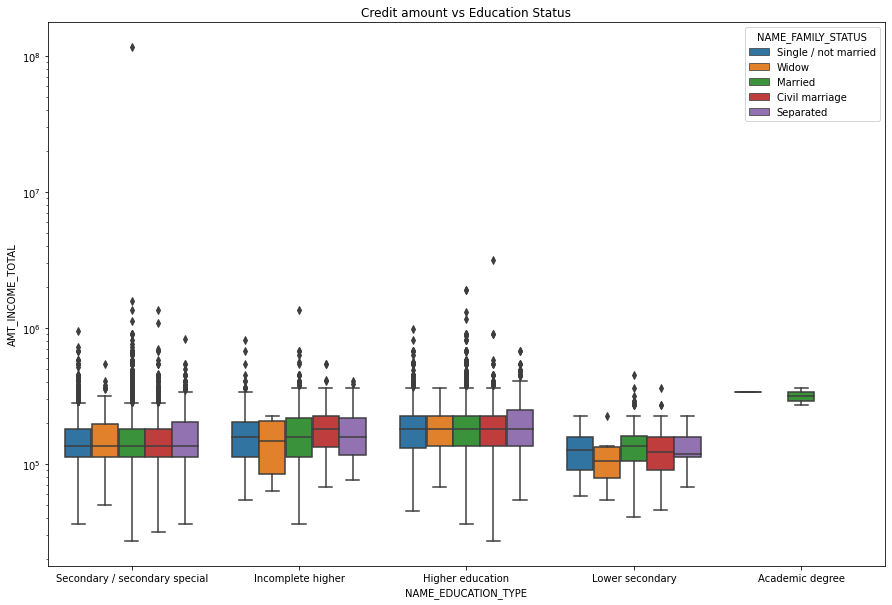

In [51]:
# Box plotting for Credit amount
plt.style.use("default")
%matplotlib inline
plt.figure(figsize=(15,10))
plt.yscale('log')
sns.boxplot(data =defaulters, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

## Performing the Analysis on Previous Application Dataset

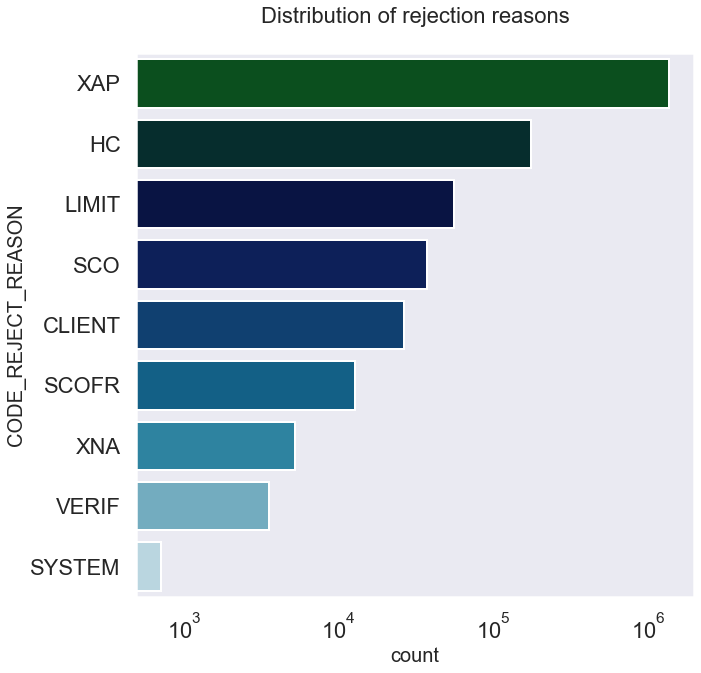

In [52]:
plt.style.use("default")
%matplotlib inline
sns.set_style('dark')
sns.set_context('poster')

plt.figure(figsize=(10,10))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xscale('log')
plt.title('Distribution of rejection reasons')
ax = sns.countplot(data = prev_data, y= 'CODE_REJECT_REASON', 
                   order=prev_data['CODE_REJECT_REASON'].value_counts().index,palette='ocean')

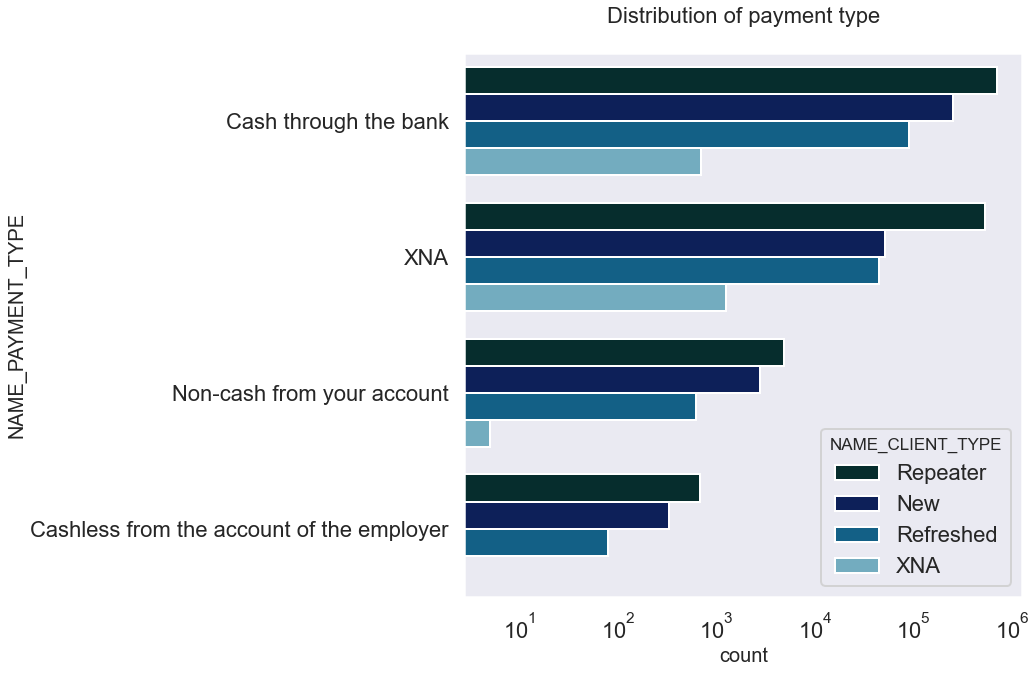

In [53]:
plt.style.use("default")
%matplotlib inline
sns.set_style('dark')
sns.set_context('poster')

plt.figure(figsize=(10,10))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.xscale('log')
plt.title('Distribution of payment type')
ax = sns.countplot(data = prev_data, y= 'NAME_PAYMENT_TYPE', hue='NAME_CLIENT_TYPE', 
                   order=prev_data['NAME_PAYMENT_TYPE'].value_counts().index,palette='ocean', )


```Observation:``` For most of the applicants, the preferred payment type is cash through the bank.

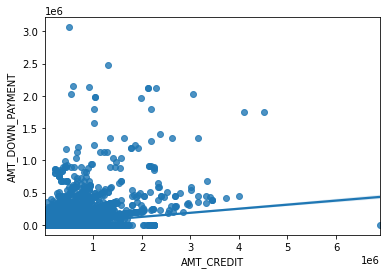

In [54]:
plt.style.use("default")
%matplotlib inline
#plt.figure(figsize=(10,10))
sns.regplot(
    x='AMT_CREDIT',
    y='AMT_DOWN_PAYMENT',
    data=prev_data,
)
plt.title('Relationship of Credit Amount vs Down Payment',fontsize=15)

plt.show()

```Observation:``` There is one value which has a huge sum of money has down payment despite of low credit amount. For most of the values we observe that as the credit amount increases, the downpayment does not increases linearly. There is a very slight increase in down payment.

## Combining the datasets and performing the analysis

In [55]:
plt.style.use("default")
%matplotlib inline
comb_dataset = pd.merge(
    left=app_data,
    right=prev_data,
    how='inner',
    on='SK_ID_CURR',
    left_on=None,
    right_on=None,
    suffixes='_x'
)

In [56]:
comb_dataset.shape

(1140063, 55)

In [57]:
comb_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_ANNUITY_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,2120,1,1,0,Laborers,1.0,2,2,Business Entity Type 3,0.262949,Below Avg,Above_Avg_Income,400000-450000,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,291,1,1,0,Core staff,2.0,1,1,School,0.622246,High,High_Income,500000 and above,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,291,1,1,0,Core staff,2.0,1,1,School,0.622246,High,High_Income,500000 and above,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,291,1,1,0,Core staff,2.0,1,1,School,0.622246,High,High_Income,500000 and above,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,2531,1,1,0,Laborers,1.0,2,2,Government,0.555912,Low,Low_Income,100000-150000,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,Y,1,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


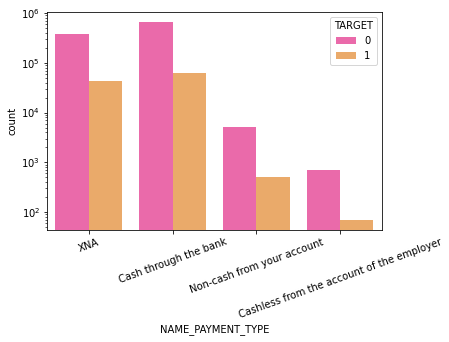

In [58]:
plt.style.use("default")
%matplotlib inline
sns.countplot(
    x='NAME_PAYMENT_TYPE',
    hue='TARGET',
    data=comb_dataset,
    palette = 'spring'
)
plt.yscale('log')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=20)
plt.show()

```Observation:``` XNA seems to be an invalid value, however we find that there are many data points with that value. We find that cash though the bank is the most used payment type.

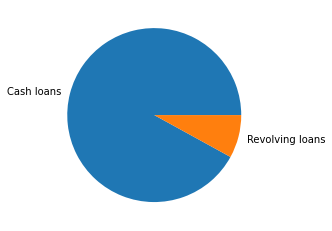

In [59]:
plt.style.use("default")
%matplotlib inline

comb_dataset['NAME_CONTRACT_TYPE_'].value_counts().plot.pie()
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.ylabel("")
plt.show()

````observation:````From the above graph, Majority of the loans are cash loans

In [60]:
comb_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_ANNUITY_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,2120,1,1,0,Laborers,1.0,2,2,Business Entity Type 3,0.262949,Below Avg,Above_Avg_Income,400000-450000,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,291,1,1,0,Core staff,2.0,1,1,School,0.622246,High,High_Income,500000 and above,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,291,1,1,0,Core staff,2.0,1,1,School,0.622246,High,High_Income,500000 and above,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,291,1,1,0,Core staff,2.0,1,1,School,0.622246,High,High_Income,500000 and above,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,2531,1,1,0,Laborers,1.0,2,2,Government,0.555912,Low,Low_Income,100000-150000,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,Y,1,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


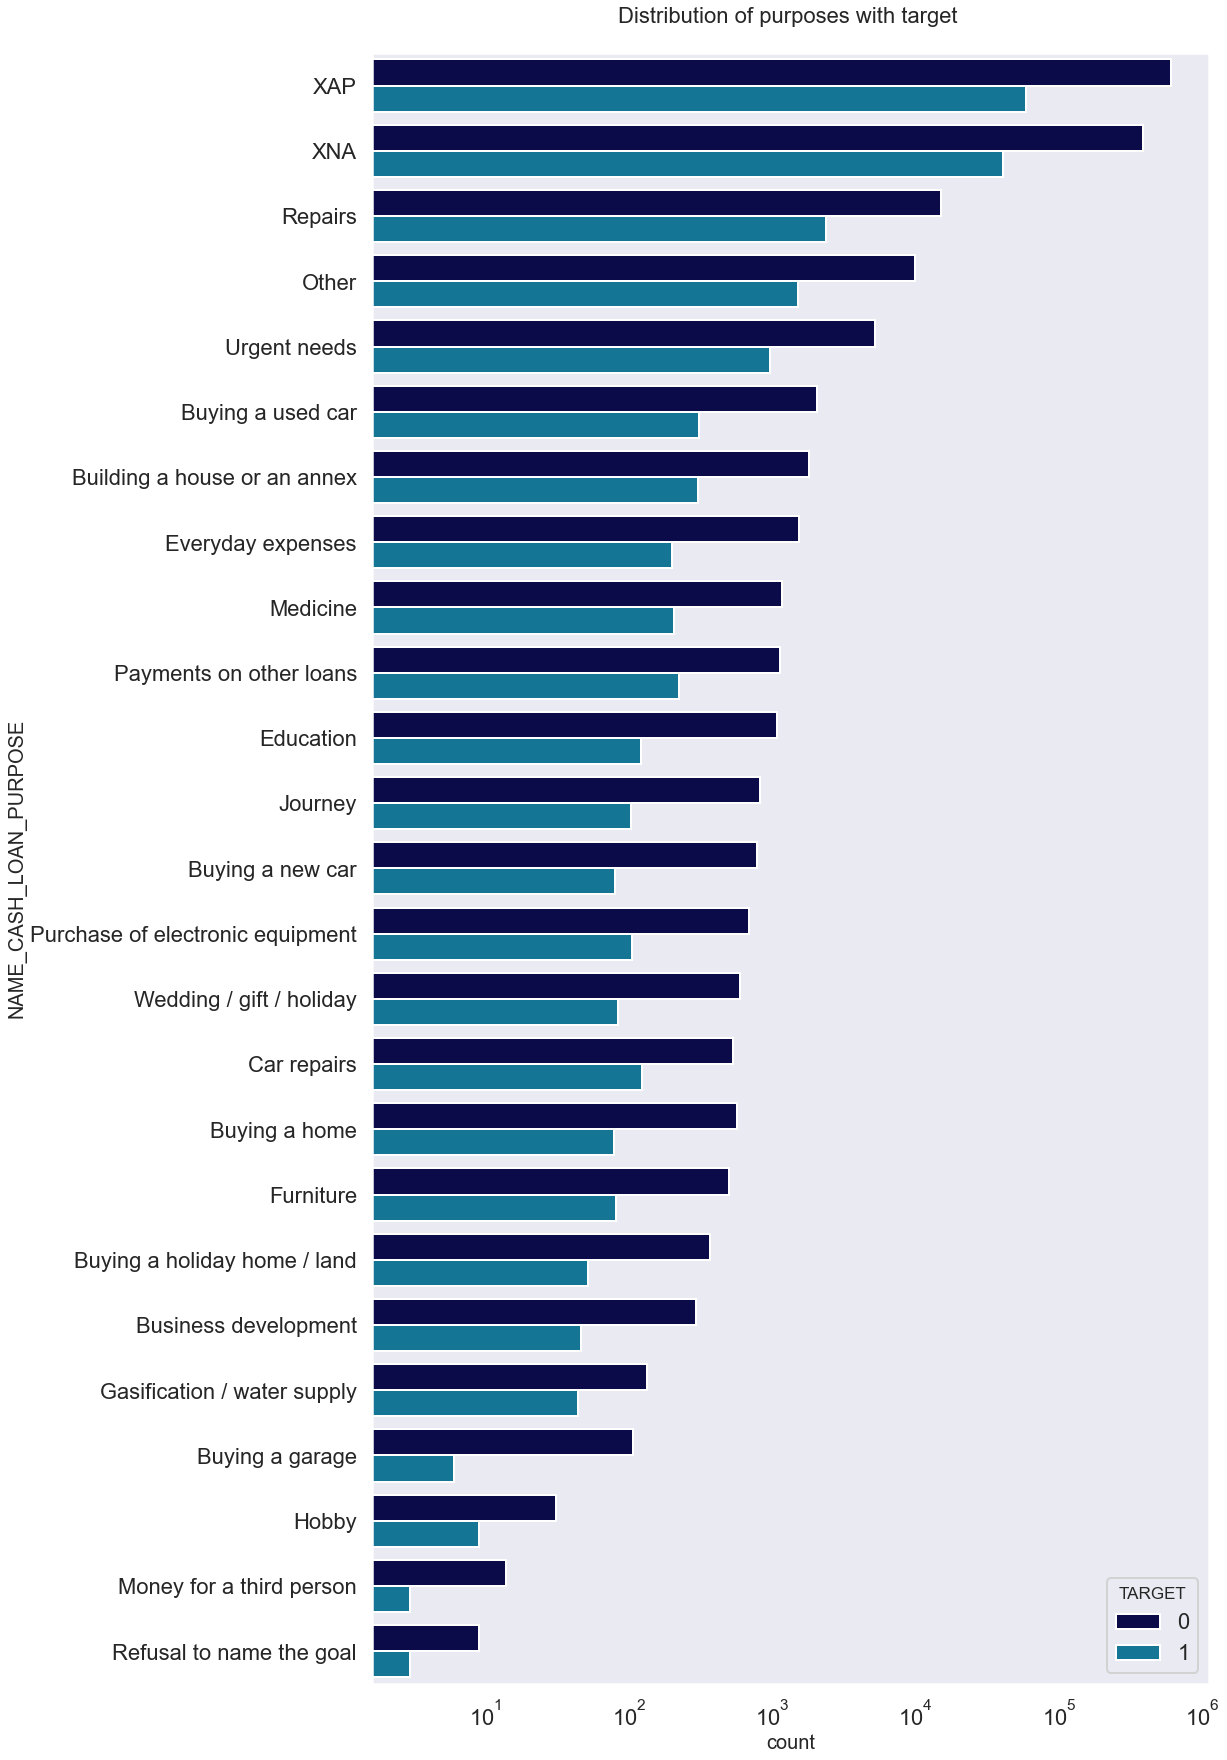

In [61]:
# Distribution of contract status
plt.style.use("default")
%matplotlib inline
sns.set_style('dark')
sns.set_context('poster')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = comb_dataset, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=comb_dataset['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='ocean')

```Observation:``` Here we observe that the people who are taking loans have taken it for XAP. We do find values for XNA ,which need to be removed as they seem invalid. There are very few people who have taken a loan for a third person.We also observe that the percentage of defaulters is less than 40% when a person is taking a loan to buy a garage

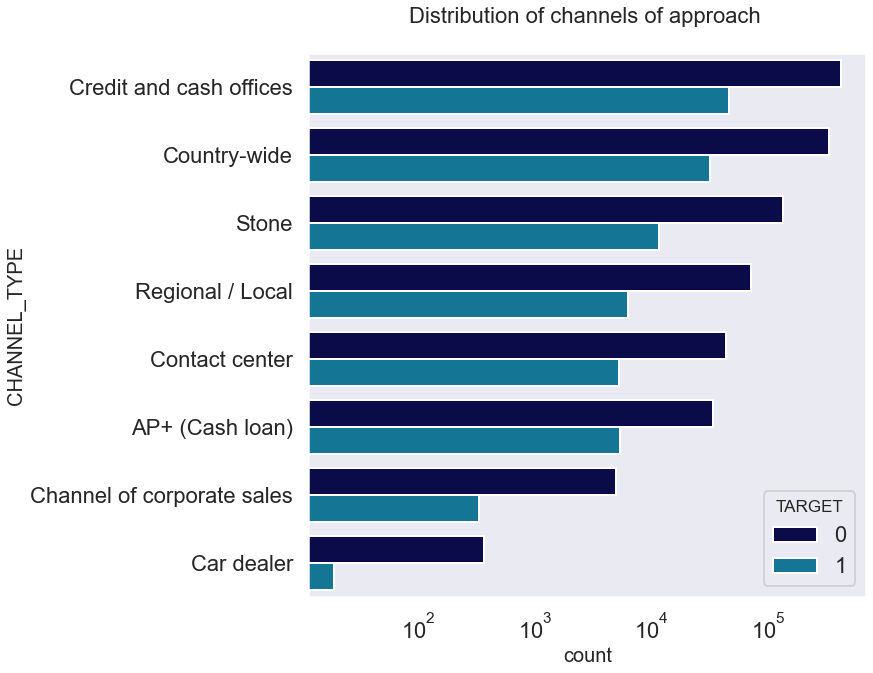

In [62]:
# Distribution of people approaching for loans
plt.style.use("default")
%matplotlib inline
sns.set_style('dark')
sns.set_context('poster')

plt.figure(figsize=(10,10))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xscale('log')
plt.title('Distribution of channels of approach ')
ax = sns.countplot(data = comb_dataset, y= 'CHANNEL_TYPE', 
                   order=comb_dataset['CHANNEL_TYPE'].value_counts().index,hue = 'TARGET',palette='ocean')

The chances that a person taking a loan was approached through credit and cash offices are the highest. There are very few people who have taken a loan when a car dealer approached.

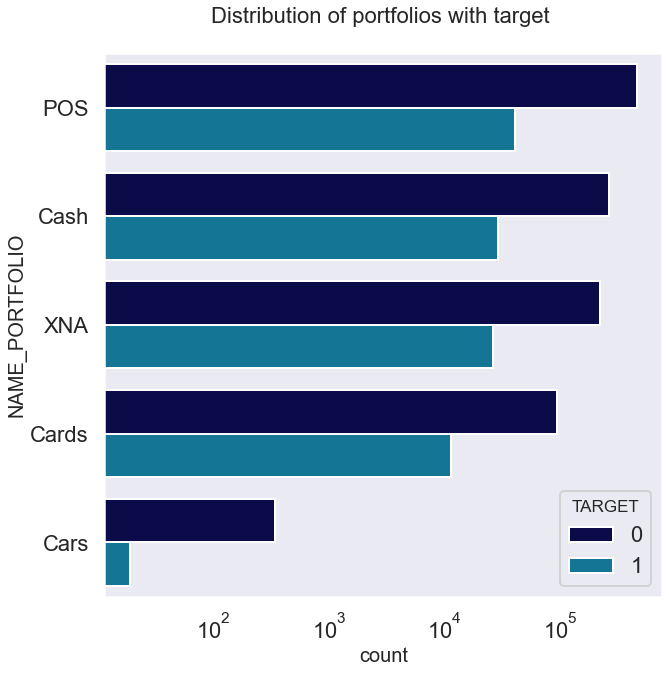

In [63]:
# Distribution of people approaching for loans
plt.style.use("default")
%matplotlib inline
sns.set_style('dark')
sns.set_context('poster')

plt.figure(figsize=(10,10))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=0)
plt.xscale('log')
plt.title('Distribution of portfolios with target ')
ax = sns.countplot(data = comb_dataset, y= 'NAME_PORTFOLIO', 
                   order=comb_dataset['NAME_PORTFOLIO'].value_counts().index,hue = 'TARGET',palette='ocean')


In [ ]:
plt.style.use("default")
%matplotlib inline
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.title('Application Data')
sns.regplot(
    x='AMT_CREDIT_',
    y='AMT_ANNUITY_',
    data=comb_dataset
)
plt.subplot(1,2,2)
plt.title('Previous Data')
sns.regplot(
    x='AMT_CREDITx',
    y='AMT_ANNUITYx',
    data=comb_dataset
)
plt.show()

```Observation:``` From these two plots we observe that the annuity and credit have a linear relationship in both the plots.